# Goals:
    
    In this module, you will learn how to build a world cloud

In [29]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem.porter import PorterStemmer
import emoji
import re
import string

In [32]:
porter_stemmer = PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')

def preprocessing_text(text):
    #remove punctuation
    lower_sentence = text.lower()
    no_emoji = emoji.demojize(lower_sentence, delimiters=("", ""))
    no_url = re.sub(r"http\S+", "", no_emoji)
    no_pun_sentence = "".join([character for character in no_url if character not in string.punctuation]) 
    no_stopwords = " ".join([i for i in no_pun_sentence.lower().split(' ') if i not in stopwords])
    stem_text = "".join([porter_stemmer.stem(word) for word in no_stopwords.split(' ')])
    
    return no_stopwords

## Task 1 Preprocess text

concatenate all the tweets into one big piece of text

In [ ]:
tweet_dict = {
  1: {"userid": "000234",
  "Tweet": "That strange moment when someone reminds the teacher about the homework."},
  2: {"userid": "002214",
  "Tweet": "Hey, I get really nervous when I see others studying so much before the test.🔥 🔥!!"},     
}

In [52]:
def preprocess_tweets(tweets):
    
    new_tweets = {}
    for k, v in tweets.items():
        new_tweet = preprocessing_text(v['Tweet'])
        print(k, new_tweet)
        new_tweets[v['userid']] = new_tweet
        
    return new_tweets

In [54]:
new_dict = preprocess_tweets(tweet_dict)
new_dict

1 strange moment someone reminds teacher homework
2 hey get really nervous see others studying much testfire fire


{'000234': 'strange moment someone reminds teacher homework',
 '002214': 'hey get really nervous see others studying much testfire fire'}

In [73]:
# append all tweets to one piece of text
def all_tweets(tweets):
    
    all_t = ""
    for k, v in tweets.items():
        all_t += str(v) + " " 
        
    return all_t

all_t = all_tweets(new_dict)
all_t

'strange moment someone reminds teacher homework hey get really nervous see others studying much testfire fire '

# Word Cloud

now you can run wordcloud with the text 

In [75]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(all_t)

In [69]:
import matplotlib.pyplot as plt

In [76]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

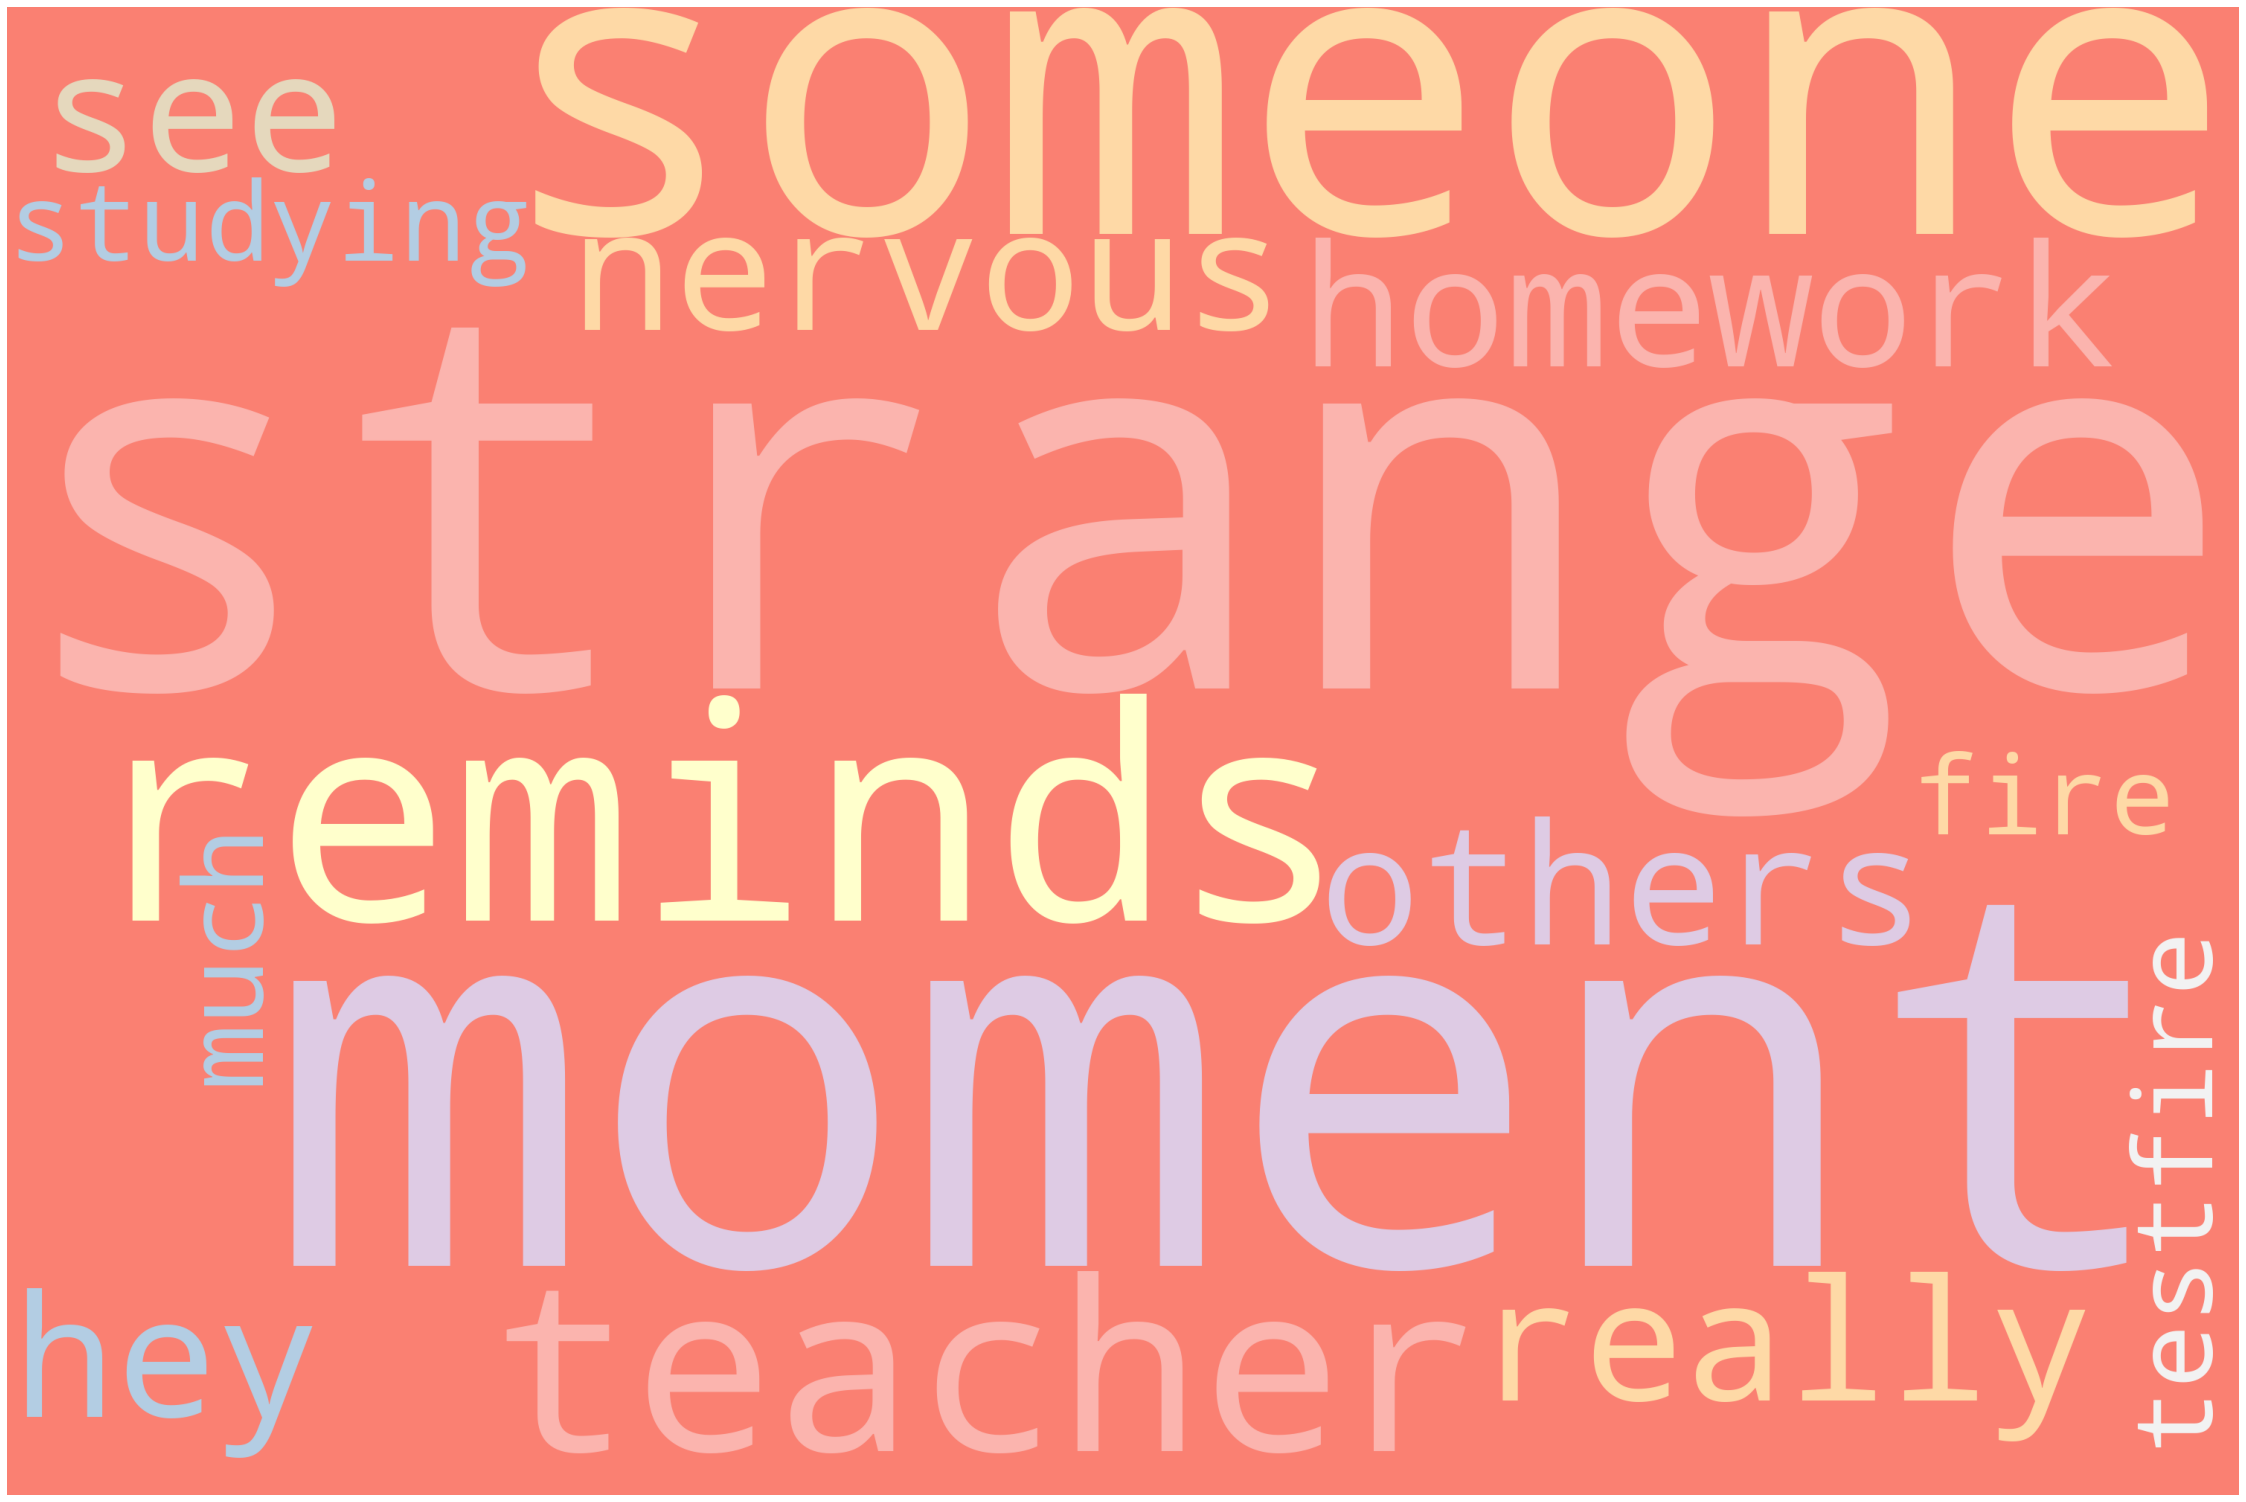

In [77]:
plot_cloud(wordcloud)